# Car price prediction 

In [9]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [10]:
# Loading dataset into dataframe
df=pd.read_excel("Data_Train.xlsx")
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [11]:
df.shape

(6019, 12)

In [12]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [13]:
df.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

In [14]:
df.nunique()

Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
Price                1373
dtype: int64

### Data Preprocessing

In [15]:
df['Engine'].value_counts()

1197 CC    606
1248 CC    512
1498 CC    304
998 CC     259
2179 CC    240
          ... 
2147 CC      1
2487 CC      1
1422 CC      1
1489 CC      1
2112 CC      1
Name: Engine, Length: 146, dtype: int64

In [16]:
df['Engine'].fillna('1197 CC',inplace=True)

In [17]:
df['Mileage'].value_counts()

18.9 kmpl     172
17.0 kmpl     172
18.6 kmpl     119
20.36 kmpl     88
21.1 kmpl      86
             ... 
17.09 kmpl      1
21.1 km/kg      1
7.81 kmpl       1
8.3 kmpl        1
27.28 kmpl      1
Name: Mileage, Length: 442, dtype: int64

In [18]:
df['Mileage'].fillna('18.9 kmpl',inplace=True)

In [19]:
df['Power'].value_counts()

74 bhp        235
98.6 bhp      131
73.9 bhp      125
140 bhp       123
78.9 bhp      111
             ... 
227 bhp         1
231.1 bhp       1
181.43 bhp      1
80.9 bhp        1
503 bhp         1
Name: Power, Length: 372, dtype: int64

In [20]:
df['Power'].fillna('74 bhp',inplace=True)

In [21]:
df['Mileage']=df['Mileage'].replace("0.0 kmpl", "17.0 kmpl")

In [22]:
df['Power'] = df['Power'].replace("null bhp", "74 bhp")

In [23]:
df.dropna(subset = ["Seats"], inplace=True)


In [24]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

In [25]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

In [26]:
df['Power'] = pd.to_numeric(df['Power'].str.lower().str.split().str.get(0), errors='coerce')
df['Engine'] = pd.to_numeric(df['Engine'].str.lower().str.split().str.get(0), errors='coerce')

In [27]:
df.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [28]:
# converting km/kg into kmpl because most of the data point are kmpl
Common_Mileage_In_kmpl = []

for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Common_Mileage_In_kmpl.append(float(i))
        
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Common_Mileage_In_kmpl.append(float(i))

In [29]:
df['Mileage'] = Common_Mileage_In_kmpl

In [30]:
Company = [i.split()[0] for i in df['Name']]
df.insert(0,'Company',Company)

In [31]:
df.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,1.75
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582,126.20,5.0,12.50
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199,88.70,5.0,4.50
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248,88.76,7.0,6.00
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968,140.80,5.0,17.74


In [32]:
df["Price"] = df["Price"]*100000

In [33]:
df = df.astype({"Price":'int64'})

In [34]:
df.dtypes

Company               object
Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                  int64
dtype: object

### Data Analysis 

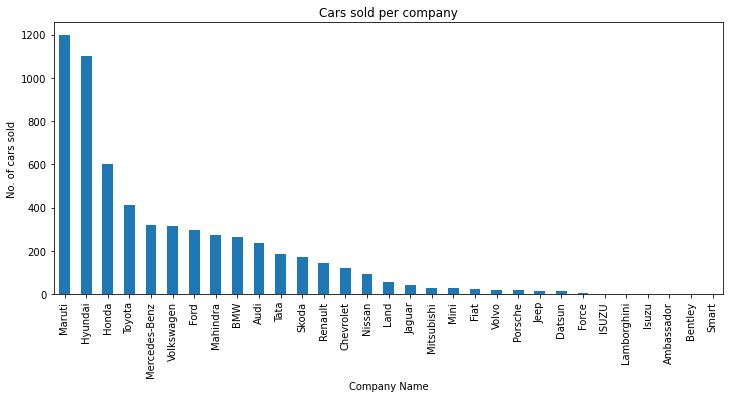

In [35]:
company_count=df['Company'].value_counts()
plt.figure(figsize=(12,5))
plt.xlabel('Company Name')
plt.ylabel('No. of cars sold')
plt.title('Cars sold per company')
company_count.plot(kind='bar')
plt.show()

Text(0.5, 1.0, 'Counting transmission based on owner type')

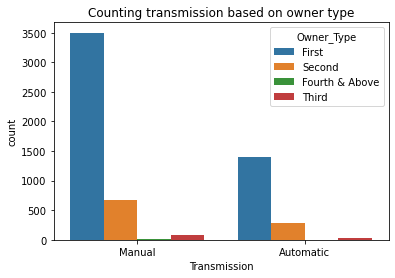

In [36]:
sns.countplot(x = 'Transmission', hue ='Owner_Type', data = df )
plt.title('Counting transmission based on owner type')

Text(0.5, 1.0, 'Counting transamission based on Fuel type')

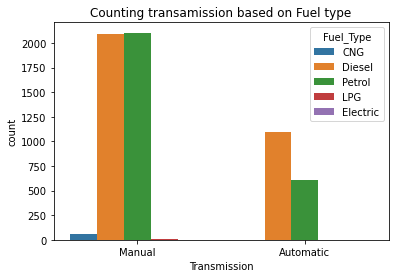

In [37]:
sns.countplot(x = 'Transmission', hue ='Fuel_Type', data = df )
plt.title('Counting transamission based on Fuel type')

Text(0.5, 1.0, 'kilometer driven')

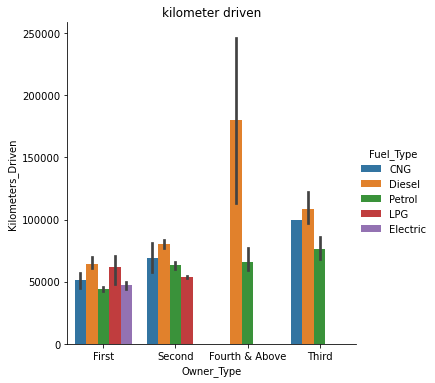

In [38]:
sns.catplot(x = 'Owner_Type', y = 'Kilometers_Driven',hue = 'Fuel_Type',kind = 'bar', data = df)
plt.title('kilometer driven')

In [39]:
df['Number_Of_Year'] = 2021 - df['Year']
df.drop(['Year'],axis=1)

,Company,Name,Location,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Number_Of_Year
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,72000,CNG,Manual,First,37.24,998,58.16,5.0,175000,11
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,41000,Diesel,Manual,First,19.60,1582,126.20,5.0,1250000,6
2,Honda,Honda Jazz V,Chennai,46000,Petrol,Manual,First,18.00,1199,88.70,5.0,450000,10
3,Maruti,Maruti Ertiga VDI,Chennai,87000,Diesel,Manual,First,20.70,1248,88.76,7.0,600000,9
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,40670,Diesel,Automatic,Second,15.00,1968,140.80,5.0,1773999,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti,Maruti Swift VDI,Delhi,27365,Diesel,Manual,First,28.00,1248,74.00,5.0,475000,7
6015,Hyundai,Hyundai Xcent 1.1 CRDi S,Jaipur,100000,Diesel,Manual,First,24.00,1120,71.00,5.0,400000,6
6016,Mahindra,Mahindra Xylo D4 BSIV,Jaipur,55000,Diesel,Manual,Second,14.00,2498,112.00,8.0,290000,9
6017,Maruti,Maruti Wagon R VXI,Kolkata,46000,Petrol,Manual,First,18.00,998,67.10,5.0,265000,8


In [40]:
df[df['Kilometers_Driven'] > 1000000]

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Number_Of_Year
2328,BMW,BMW X5 xDrive 30d M Sport,Chennai,2017,6500000,Diesel,Automatic,First,15.9,2993,258.0,5.0,6500000,4


In [41]:
kilometers_driven_mean = df['Kilometers_Driven'].mean()
df['Kilometers_Driven'] = [i if i < 1000000 else float(int(kilometers_driven_mean)) for i in df.Kilometers_Driven]

In [42]:
df['Kilometers_Driven'].max()

775000.0

In [43]:
df = df.astype({"Kilometers_Driven":'int'})

In [44]:
df['Kilometers_Driven'].max()

775000

In [45]:
df.shape

(5977, 14)

In [46]:
data = df.copy()

In [47]:
#one hot Encoding
company_dummies = pd.get_dummies(df['Company'])
name_dummies = pd.get_dummies(df['Name'])
location_dummies = pd.get_dummies(df['Location'])
fuel_type_dummies = pd.get_dummies(df['Fuel_Type'])
transmission_dummies = pd.get_dummies(df['Transmission'])
owner_type_dummies = pd.get_dummies(df['Owner_Type'])

In [48]:
features = df[['Number_Of_Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [49]:
df = pd.concat([features, company_dummies, name_dummies, location_dummies, fuel_type_dummies, 
                transmission_dummies, owner_type_dummies], axis=1)

In [50]:
df.rename(columns={'Fourth & Above': 'More'},inplace=True, errors='raise')

### Model Building 

In [51]:
X = df.drop(['Price'], axis=1) #independent variables
Y = df['Price'] #target variable

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [53]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4183, 1916), (4183,), (1794, 1916), (1794,))

In [54]:
gredR = GradientBoostingRegressor(max_depth = 2, n_estimators = 4, learning_rate = 1.0)
gredR.fit(X_train, y_train)
gredR.score(X_test,y_test)

0.7665767224848138

In [122]:
#hyper parameter tunning
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate': [0.15, .1, .12, 0.05],'n_estimators':[50, 100, 150, 200, 250]}

tuning = GridSearchCV(estimator=GradientBoostingRegressor(),
                           param_grid=LR, scoring ='r2')
tuning.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
tuning.best_params_, tuning.best_score_

In [55]:
gredR = GradientBoostingRegressor( n_estimators = 250, learning_rate=0.15)
gredR.fit(X_train, y_train)
gredR.score(X_test,y_test)

0.9188450538173875

# Prediction

In [56]:
def predict_price(year, kilometers_driven, mileage, engine, power, seats, company, name, location, fuel_type, transmission, owner_type):
    company_index = np.where(X.columns==company)[0][0]
    name_index = np.where(X.columns==name)[0][0]
    location_index = np.where(X.columns==location)[0][0]
    fuel_type_index = np.where(X.columns==fuel_type)[0][0]
    transmission_index = np.where(X.columns==transmission)[0][0]
    owner_type_index = np.where(X.columns==owner_type)[0][0]
    data = np.zeros(len(X.columns))
    data[0] = year
    data[1] = kilometers_driven
    data[2] = mileage
    data[3] = engine
    data[4] = power
    data[5] = seats
    if company_index >= 0:
        data[company_index] = 1
    if name_index >= 0:
        data[name_index] = 1
    if location_index >= 0:
        data[location_index] = 1
    if fuel_type_index >= 0:
        data[fuel_type_index] = 1
    if transmission_index >= 0:
        data[transmission_index] = 1
    if owner_type_index >= 0:
        data[owner_type_index] = 1

    result = gredR.predict([data])
    return int(result[0])

In [57]:
predict_price(5,20000, 19, 1582, 126.20, 5.0, 'Hyundai',
              'Hyundai Creta 1.6 CRDi SX Option', 'Pune', 'Petrol', 'Manual', 'Second'
             )

1024115

In [58]:
predict_price(7, 20000,15.5, 1582, 126.20, 5.0, 'Hyundai',
              'Hyundai Creta 1.6 CRDi SX Option', 'Pune', 'Petrol', 'Manual', 'First'
             )

778760

In [59]:
predict_price(7, 20000,15.5, 1582, 126.20, 5.0, 'Hyundai',
              'Hyundai Creta 1.6 CRDi SX Option', 'Pune', 'Petrol', 'Manual', 'Second'
             )

759690

In [60]:
try:
    predict_price(6,30567,18, 1968, 140.80, 5.0, 'Audi', 'Audi Q3 20 TDI Premium FWD',
              'Coimbatore', 'Diesel', 'Automatic', 'Second')
except:
        print("can't recognize the model or undefined features we passed")

can't recognize the model or undefined features we passed


In [61]:
predict_price(4, 20000,15.64, 1798, 167.62, 5.0, 'Audi',
              'Audi A4 1.8 TFSI Technology Edition', 'Pune', 'Petrol', 'Automatic', 'Second'
             )

2739498

In [62]:
data.head()

,Company,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Number_Of_Year
0,Maruti,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998,58.16,5.0,175000,11
1,Hyundai,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582,126.20,5.0,1250000,6
2,Honda,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199,88.70,5.0,450000,10
3,Maruti,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248,88.76,7.0,600000,9
4,Audi,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968,140.80,5.0,1773999,8


In [63]:
predict_price(11, 72000,137.24, 998, 58.16, 5.0, 'Maruti',
              'Maruti Wagon R LXI CNG', 'Mumbai', 'CNG', 'Manual', 'First'
             )

161396

In [64]:
predict_price(8, 40670,15.00, 1968, 140.80, 5.0, 'Audi',
              'Audi A4 New 2.0 TDI Multitronic', 'Coimbatore','Diesel','Automatic', 'Second'
             )

1477598

In [65]:
predict_price(8, 46000,18.00,1199, 88.70, 5, 'Honda',
              'Honda Jazz V', 'Chennai','Petrol','Manual', 'First'
             )

434943

In [66]:
predict_price(9, 87000,20.70,1248, 88.76, 7.0, 'Maruti',
              'Maruti Ertiga VDI', 'Chennai','Diesel','Manual', 'First'
             )

421680